In [79]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [80]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [81]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [82]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Tesla Stocks Revenue Extraction and cleaning

In [ ]:
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

In [84]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

html_data = response.text

soup = BeautifulSoup(html_data, 'html.parser')

tables = soup.find_all('table')

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        rows = table.find_all('tr')
        
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                
                revenue = revenue.replace('$', '').replace(',', '')
                
                new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## GME Stocks Revenue Extraction and Cleaning

In [96]:
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace = True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [108]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

soup = BeautifulSoup(html_data_2, 'html.parser')

table = soup.find_all("tbody")[1]  


gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        revenue = revenue.replace('$', '').replace(',', '')

        gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\\$', "", regex=True)
        gme_revenue.dropna(inplace=True)

        temp_df = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        
        gme_revenue = pd.concat([gme_revenue, temp_df], ignore_index=True)

print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Tesla graph representation

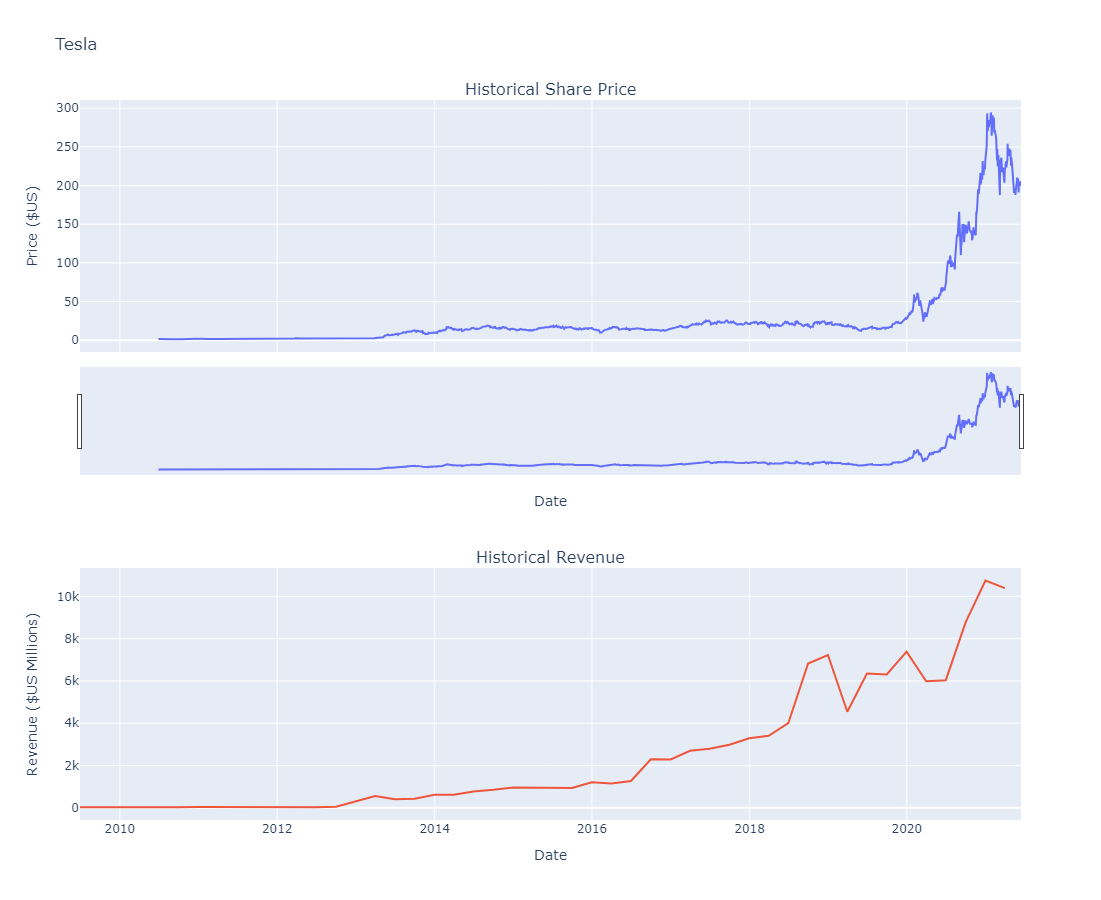

In [116]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


## GME graph representation

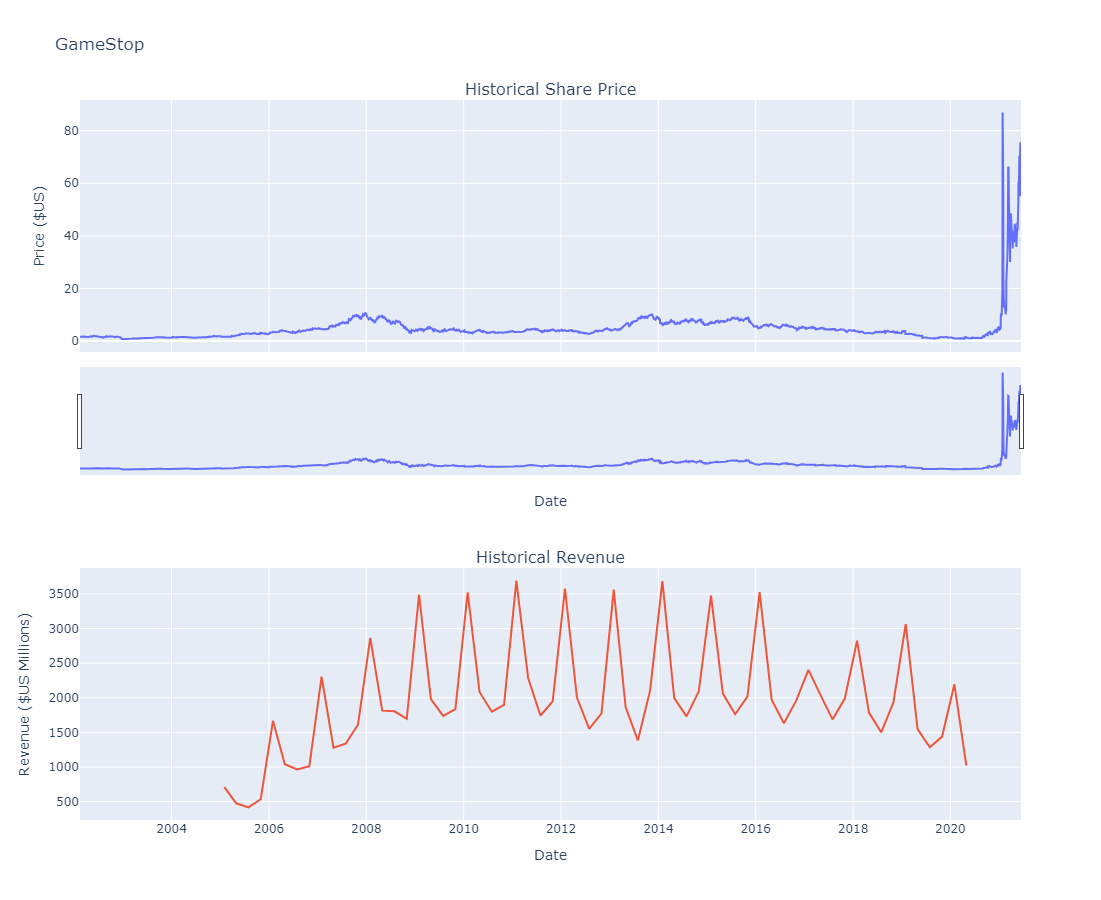

In [106]:
make_graph(gme_data, gme_revenue, 'GameStop')